# Web scraping

## got to website and download 10 files
- https://www.worksheetfun.com/2013/03/16/number-coloring-pages-10-worksheets/


In [1]:
for i in range(1,11):
    url = f'http://www.worksheetfun.com/counting/number%20{i}%20coloring.pdf'
    print(url)

http://www.worksheetfun.com/counting/number%201%20coloring.pdf
http://www.worksheetfun.com/counting/number%202%20coloring.pdf
http://www.worksheetfun.com/counting/number%203%20coloring.pdf
http://www.worksheetfun.com/counting/number%204%20coloring.pdf
http://www.worksheetfun.com/counting/number%205%20coloring.pdf
http://www.worksheetfun.com/counting/number%206%20coloring.pdf
http://www.worksheetfun.com/counting/number%207%20coloring.pdf
http://www.worksheetfun.com/counting/number%208%20coloring.pdf
http://www.worksheetfun.com/counting/number%209%20coloring.pdf
http://www.worksheetfun.com/counting/number%2010%20coloring.pdf


In [2]:
# http://www.worksheetfun.com/counting/number%201%20coloring.pdf
# http://www.worksheetfun.com/counting/number%202%20coloring.pdf
import requests # it web scraping library 

for i in range(1,11):
    url = f'http://www.worksheetfun.com/counting/number%20{i}%20coloring.pdf'
    print(url)
    r = requests.get(url)
    print(r)

http://www.worksheetfun.com/counting/number%201%20coloring.pdf
<Response [403]>
http://www.worksheetfun.com/counting/number%202%20coloring.pdf
<Response [403]>
http://www.worksheetfun.com/counting/number%203%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%204%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%205%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%206%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%207%20coloring.pdf
<Response [403]>
http://www.worksheetfun.com/counting/number%208%20coloring.pdf
<Response [403]>
http://www.worksheetfun.com/counting/number%209%20coloring.pdf
<Response [403]>
http://www.worksheetfun.com/counting/number%2010%20coloring.pdf
<Response [200]>


In [4]:
# http://www.worksheetfun.com/counting/number%201%20coloring.pdf
# http://www.worksheetfun.com/counting/number%202%20coloring.pdf
import requests # it web scraping library 
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64)\
 AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}

for i in range(1,11):
    url = f'http://www.worksheetfun.com/counting/number%20{i}%20coloring.pdf'
    print(url)
    r = requests.get(url,headers=headers)
    print(r)

http://www.worksheetfun.com/counting/number%201%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%202%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%203%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%204%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%205%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%206%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%207%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%208%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%209%20coloring.pdf
<Response [200]>
http://www.worksheetfun.com/counting/number%2010%20coloring.pdf
<Response [200]>


In [2]:
# http://www.worksheetfun.com/counting/number%201%20coloring.pdf
# http://www.worksheetfun.com/counting/number%202%20coloring.pdf
import requests # it web scraping library 

for i in range(1,11):
    url = f'http://www.worksheetfun.com/counting/number%20{i}%20coloring.pdf'
    print(url)
    r = requests.get(url)
    with open(f'downloads/number{i}.pdf', 'wb') as f: # just opening file
        f.write(r.content)

http://www.worksheetfun.com/counting/number%201%20coloring.pdf
http://www.worksheetfun.com/counting/number%202%20coloring.pdf
http://www.worksheetfun.com/counting/number%203%20coloring.pdf
http://www.worksheetfun.com/counting/number%204%20coloring.pdf
http://www.worksheetfun.com/counting/number%205%20coloring.pdf
http://www.worksheetfun.com/counting/number%206%20coloring.pdf
http://www.worksheetfun.com/counting/number%207%20coloring.pdf
http://www.worksheetfun.com/counting/number%208%20coloring.pdf
http://www.worksheetfun.com/counting/number%209%20coloring.pdf
http://www.worksheetfun.com/counting/number%2010%20coloring.pdf


In [4]:
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}


In [4]:
# http://www.worksheetfun.com/counting/number%201%20coloring.pdf
# http://www.worksheetfun.com/counting/number%202%20coloring.pdf
import requests

for i in range(1,11):
    url = f'http://www.worksheetfun.com/counting/number%20{i}%20coloring.pdf'
    print(url)
    r = requests.get(url,headers=headers)
    with open(f'downloads/number{i}.pdf', 'wb') as f: # 'wb' write binary
        f.write(r.content)

http://www.worksheetfun.com/counting/number%201%20coloring.pdf
http://www.worksheetfun.com/counting/number%202%20coloring.pdf
http://www.worksheetfun.com/counting/number%203%20coloring.pdf
http://www.worksheetfun.com/counting/number%204%20coloring.pdf
http://www.worksheetfun.com/counting/number%205%20coloring.pdf
http://www.worksheetfun.com/counting/number%206%20coloring.pdf
http://www.worksheetfun.com/counting/number%207%20coloring.pdf
http://www.worksheetfun.com/counting/number%208%20coloring.pdf
http://www.worksheetfun.com/counting/number%209%20coloring.pdf
http://www.worksheetfun.com/counting/number%2010%20coloring.pdf


# Diving deeper 
- Web scraping - using a program to download and process content from the web.![](../images/2022-12-02-10-08-10.png)

## python modules for web scraping
- `webbrowser` Comes with Python and opens a browser to a specific page.
- `requests` Downloads files and web pages from the internet.

- `bs4` Parses HTML, the format that web pages are written in.

- `selenium` Launches and controls a web browser. The selenium module is able to fill in forms and simulate mouse clicks in this browser.

## Webbrowser 
- open a browser
- example with map it
    - `python mapIt.py inha university incheon`

In [2]:
import webbrowser

webbrowser.open('https://learn.inha.ac.kr/')

True

## requests
- third party module
    - `pip install --user requests`
- The requests.get() function takes a `string` of a URL to download

In [3]:
import requests
response = requests.get('https://raw.githubusercontent.com/Jumabek/software_programming_in_python/main/individual_project_sample/app.py')

In [4]:
type(response)

requests.models.Response

In [5]:
response.status_code 

200

![](2022-12-15-11-14-32.png)

In [7]:
print(response.text)

# following three global variables are used throught the program
students = [
    'Josue Sutton'
    , 'Josephine Graham'
    , 'Jesus Moss'
    , 'Kian Crane'
    ,'Presley Cooper'
    ,'Jaeden Yu'
    ,'Lorenzoption Lawrence'
    ,'Lindsey Mcdonald'
    ,'Grace Rivers'
    ,'Lawrence Giles'
    ,'Blake Odonnell'
    ,'Alexis Bruce'
]
questions_asked = [0]*len(students) # makes a list with length of students, and fills it with 0
correct_answers = [0]*len(students) # makes a list with length of students, and fills it with 0


def print_user_options():
    print("Select option for performing an operation:\n")
    print("pa - print all students")
    print("a - ask a question")
    print("p - print the performance of the students")
    print("q - quit")
    option = input("enter here: ")
    return option


def print_all_students():
    print("All students:")
    for i, student in enumerate(students):
        print(i, student)


def get_random_student():
    import random
    return rand

## download HTML content

In [9]:
res = requests.get('https://learn.inha.ac.kr/')
print(res.text[:1000])


<!DOCTYPE html>
<html  dir="ltr" lang="ko" xml:lang="ko" class="html_login">
<head>
    <title>인하대학교 I-Class</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, target-densitydpi=medium-dpi" />
    <meta name="keywords" content="moodle, coursemos, 코스모스">
    <link rel="shortcut icon" href="https://learn.inha.ac.kr/theme/image.php/coursemosv2/theme/1670223805/favicon" />
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="keywords" content="moodle, 인하대학교 학습관리시스템: 사이트에 로그인" />
<link rel="stylesheet" type="text/css" href="https://learn.inha.ac.kr/theme/yui_combo.php?rollup/3.17.2/yui-moodlesimple-min.css" /><script id="firstthemesheet" type="text/css">/** Required in order to fix style inclusion problems in IE with YUI **/</script><link rel="stylesheet" type="text/css" href="https://learn.inha.ac.kr/theme/styl


## What is HTML
- An HTML file is a plaintext file with the .html file extension.
- text in this files ss surrounded by `tag`s
    - `<title>인하대학교 I-Class</title>`
- The `tag`s tell the browser how to format the web page
    - E: <strong>Hello</strong>, world! example
- Example tag for hyperlink
    - Al's free `<a href="https://inventwithpython.com">Python books</a>`.
- we can view source HTML of web page
- Inspect Element using developer tools


## Viewing the Source HTML of a Web Page


## save downloaded files to the hard drive (local computer storage)

In [14]:
print(res.text[:1000])

<!DOCTYPE html>
<html  dir="ltr" lang="ko" xml:lang="ko" class="html_login">
<head>
    <title>인하대학교 I-Class</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, target-densitydpi=medium-dpi" />
    <meta name="keywords" content="moodle, coursemos, 코스모스">
    <link rel="shortcut icon" href="https://learn.inha.ac.kr/theme/image.php/coursemosv2/theme/1670223805/favicon" />
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="keywords" content="moodle, 인하대학교 학습관리시스템: 사이트에 로그인" />
<link rel="stylesheet" type="text/css" href="https://learn.inha.ac.kr/theme/yui_combo.php?rollup/3.17.2/yui-moodlesimple-min.css" /><script id="firstthemesheet" type="text/css">/** Required in order to fix style inclusion problems in IE with YUI **/</script><link rel="stylesheet" type="text/css" href="https://learn.inha.ac.kr/theme/styl


In [15]:
with open('learn_inha.html', 'w') as f:
    f.write(res.text)

In [ ]:
#contents > table > tbody > tr:nth-child(2) > td:nth-child(1)

## bs4 - Parsing HTML with the bs4 Module
![](2022-12-15-11-51-19.png)
- bs4 is better than regular expressions for web pages
    - https://beautiful-soup-4.readthedocs.io/en/latest/
- thirds party module for extracting info from HTML page
    - `!pip install --user beautifulsoup4`

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [16]:
import requests, bs4
url = 'https://web.kma.go.kr/eng/weather/forecast/current_korea.jsp'
response = requests.get(url)

In [18]:
print(res.status_code)

200


In [ ]:
# Let's see how we can select specific information using BS4

## Generalizing
![](2022-12-15-12-17-07.png)

In [35]:
selector='#contents > table > tbody > tr:nth-child(13) td'
#selector = '#contents > table > tbody > tr:nth-child(13)'

soupObject = bs4.BeautifulSoup(response.text, 'html.parser')
selected_elems = soupObject.select(selector)
selected_elems

[<td>Incheon</td>,
 <td>snow</td>,
 <td>19.3</td>,
 <td>9</td>,
 <td>-2.0</td>,
 <td>S</td>,
 <td>3.4</td>,
 <td>72</td>,
 <td>0.0</td>,
 <td>1024.4</td>]

In [37]:
len(selected_elems)

10

In [39]:
selected_elems[1].text

'snow'

In [40]:
f'Temperature at {selected_elems[0].text} is {selected_elems[4].text}'

'Temperature at Incheon is -2.0'

## putting it all together

In [41]:
import requests, bs4
url = 'https://web.kma.go.kr/eng/weather/forecast/current_korea.jsp'
response = requests.get(url)

soupObject = bs4.BeautifulSoup(response.text, 'html.parser')

selector='#contents > table > tbody > tr:nth-child(13) td'
selected_elems = soupObject.select(selector)
text = f'Temperature at {selected_elems[0].text} is {selected_elems[4].text}'
print(text)

Temperature at Incheon is -1.9


## generalizing to all cities

In [44]:
d

{'Sokcho': 2.1,
 'Bukchuncheon': -7.0,
 'Cheorwon': -6.6,
 'Dongducheon': -2.0,
 'Paju': -4.2,
 'Daegwallyeong': -7.4,
 'Chuncheon': -5.9,
 'Baengnyeongdo': 2.4,
 'Bukgangneung': 0.6,
 'Gangneung': 1.9,
 'Donghae': 2.9,
 'Seoul': -2.7,
 'Incheon': -1.9,
 'Wonju': -5.6,
 'Ulleungdo': 1.5,
 'Suwon': -3.1,
 'Yeongwol': -4.4,
 'Chungju': -5.2,
 'Seosan': 1.4,
 'Uljin': 0.4,
 'Cheongju': -0.6,
 'Daejeon': 2.7,
 'Chupungnyeong': -1.3,
 'Andong': -5.4,
 'Sangju': -4.0,
 'Pohang': 2.9,
 'Gunsan': 2.2,
 'Daegu': 0.5,
 'Jeonju': 3.6,
 'Ulsan': 3.6,
 'Changwon': 1.7,
 'Gwangju': 3.0,
 'Busan': 4.0,
 'Tongyeong': 4.3,
 'Mokpo': 3.8,
 'Yeosu': 3.3,
 'Heuksando': 6.7,
 'Wando': 5.5,
 'Gochang': 2.6,
 'Suncheon': 4.1,
 'Hongseong': 1.3,
 'Seocheongju': -2.9,
 'Jeju': 9.7,
 'Gosan': 7.9,
 'Seongsan': 9.5,
 'Seogwipo': 7.7,
 'Jinju': 1.9,
 'Ganghwa': -2.9,
 'Yangpyeong': -5.4,
 'Icheon': -5.3,
 'Inje': -4.8,
 'Hongcheon': -6.2,
 'Taebaek': -6.8,
 'Jeongseon Gun': -5.8,
 'Jecheon': -6.5,
 'Boeun': -1.9,

In [45]:
sorted_d = dict(sorted(d.items(), key=lambda item: item[1]))
sorted_d


{'Daegwallyeong': -7.4,
 'Bukchuncheon': -7.0,
 'Taebaek': -6.8,
 'Cheorwon': -6.6,
 'Jecheon': -6.5,
 'Yeongju': -6.5,
 'Hongcheon': -6.2,
 'Chuncheon': -5.9,
 'Jeongseon Gun': -5.8,
 'Wonju': -5.6,
 'Bongwhoa': -5.5,
 'Andong': -5.4,
 'Yangpyeong': -5.4,
 'Icheon': -5.3,
 'Chungju': -5.2,
 'Inje': -4.8,
 'Mungyeong': -4.5,
 'Yeongwol': -4.4,
 'Paju': -4.2,
 'Sangju': -4.0,
 'Suwon': -3.1,
 'Seocheongju': -2.9,
 'Ganghwa': -2.9,
 'Seoul': -2.7,
 'Cheongsonggun': -2.2,
 'Dongducheon': -2.0,
 'Incheon': -1.9,
 'Boeun': -1.9,
 'Cheonan': -1.7,
 'Chupungnyeong': -1.3,
 'Uiseong': -1.0,
 'Cheongju': -0.6,
 'Namwon': -0.6,
 'Buyeo': -0.2,
 'Imsil': 0.0,
 'sejong': 0.2,
 'Sunchanggun': 0.3,
 'Uljin': 0.4,
 'Gumi': 0.4,
 'Daegu': 0.5,
 'Bukgangneung': 0.6,
 'Yeongcheon': 0.8,
 'Jangsu': 1.0,
 'Hongseong': 1.3,
 'Geochang': 1.3,
 'Seosan': 1.4,
 'Ulleungdo': 1.5,
 'Namhae': 1.5,
 'Yeongdeok': 1.6,
 'Changwon': 1.7,
 'Miryang': 1.8,
 'Gangneung': 1.9,
 'Jinju': 1.9,
 'Yeonggwanggun': 2.0,
 'Hap

In [47]:
sum(sorted_d.values())/len(sorted_d)

0.6969072164948462

In [48]:
sorted_d['Incheon']

-1.9

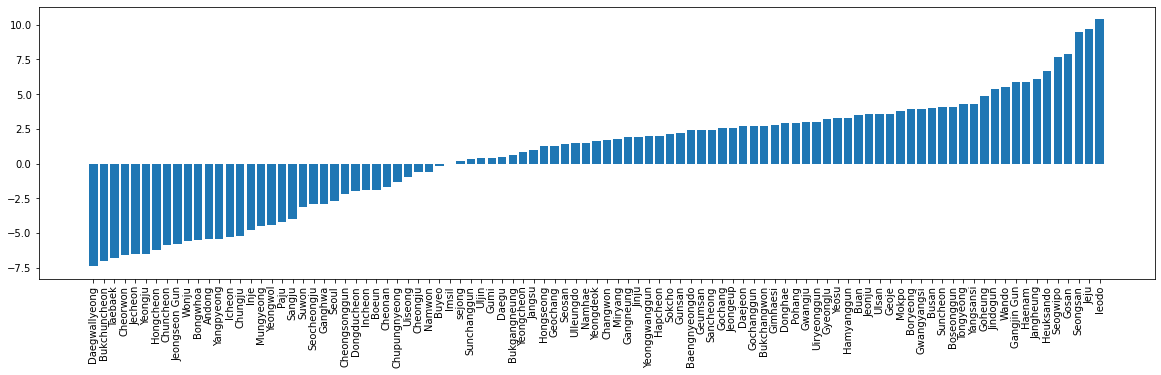

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(sorted_d.keys(), sorted_d.values())
plt.xticks(rotation=90);